The following code is actually a wrong implementation, I don't actually have an action, so it is only called a markov reward model

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import random
import string
import itertools
import matplotlib.pyplot as plt

In [3]:
up = "j"
right = "k"
skills = [up, right]
reward = 1
steps = 5
run = 10
# for i in range(steps):
#     get_key = input("try a key out, you still have {} chance(s)".format(steps - i))
#     if get_key == "j":
#         print("good try! You've got one skill")
# TODO: raise exceptions if the input is not lowercase letter 

In [4]:
state = list(itertools.product(*[(0, 1)] * 2))
state

[(0, 0), (0, 1), (1, 0), (1, 1)]

In [5]:
start_state = (0, 0)
final_state = (1, 1)

In [6]:
state_value = np.zeros(4)

In [ ]:
# set the probability of the state transition as a constant
# prob = 1/26 
# TODO: find out the true transition probability T, which should 

In [ ]:
# state value intuition
# expected returns step 3:
# state_value[2] = 23/24*state_value[2] + 1/24*reward
# state_value[1] = 23/24*state_value[1] + 1/24*reward
# state_value[0] = 22/24*state_value[0] + 1/24*state_value[1] + 1/24*state_value[2]


# expected returns step 2:
# state_value[2] = 24/25*state_value[2] + 1/25*reward
# state_value[1] = 24/25*state_value[1] + 1/25*reward
# state_value[0] = 23/25*state_value[0] + 1/25*state_value[1] + 1/25*state_value[2]

#expected returns step 1:
# state_value[0] = 24/26*state_value[0] + 1/26*state_value[1] + 1/26*state_value[2]

In [ ]:
# state_value

In [7]:
state_value_batch = []

In [8]:
state_value = np.zeros(4)
state_value_batch.append(state_value)

In [9]:
# state value without pseudo rewards
k = 26
for i in range(25):
    new_state_value = state_value.copy()
    new_state_value[0] = ((k-2)/k)*new_state_value[0] + (1/k)*new_state_value[1] + (1/k)*new_state_value[2]
    
    if i > 1:
        new_state_value[1] = ((k-1)/k)*new_state_value[1] + (1/k)*reward
        new_state_value[2] = ((k-1)/k)*new_state_value[2] + (1/k)*reward
        
        if np.sum(np.abs(new_state_value - state_value)) < 1e-4:
            state_value = new_state_value.copy()
            break      
    
    state_value = new_state_value.copy()
    print(state_value)
    state_value_batch.append(state_value)
    k -= 1

[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.          0.04166667  0.04166667  0.        ]
[ 0.00362319  0.08333333  0.08333333  0.        ]
[ 0.01086957  0.125       0.125       0.        ]
[ 0.02173913  0.16666667  0.16666667  0.        ]
[ 0.03623188  0.20833333  0.20833333  0.        ]
[ 0.05434783  0.25        0.25        0.        ]
[ 0.07608696  0.29166667  0.29166667  0.        ]
[ 0.10144928  0.33333333  0.33333333  0.        ]
[ 0.13043478  0.375       0.375       0.        ]
[ 0.16304348  0.41666667  0.41666667  0.        ]
[ 0.19927536  0.45833333  0.45833333  0.        ]
[ 0.23913043  0.5         0.5         0.        ]
[ 0.2826087   0.54166667  0.54166667  0.        ]
[ 0.32971014  0.58333333  0.58333333  0.        ]
[ 0.38043478  0.625       0.625       0.        ]
[ 0.43478261  0.66666667  0.66666667  0.        ]
[ 0.49275362  0.70833333  0.70833333  0.        ]
[ 0.55434783  0.75        0.75        0.        ]
[ 0.61956522  0.79166667  0.79166667  0.        ]
[ 0.6884058   

In [10]:
len(state_value_batch)

26

In [11]:
optimal_state_value = state_value
optimal_state_value

array([ 0.91666667,  0.95833333,  0.95833333,  0.        ])

In [12]:
state_value_pseudo_batch = []
state_value_pseudo = np.zeros(4)
state_value_pseudo_batch.append(state_value_pseudo)

In [13]:
# state value with pseudo rewards
psi = optimal_state_value.copy()
k = 26
for i in range(25):
    new_state_value = state_value_pseudo.copy()
    new_state_value[0] = ((k-2)/k)*(new_state_value[0]) + \
                        (1/k)*(optimal_state_value[1] - optimal_state_value[0] + new_state_value[1]) + \
                        (1/k)*(optimal_state_value[2] - optimal_state_value[0] + new_state_value[2])
    
    if i > 1:
        new_state_value[1] = ((k-1)/k)*new_state_value[1] + (1/k)*(optimal_state_value[3] - optimal_state_value[1] + reward)
        new_state_value[2] = ((k-1)/k)*new_state_value[2] + (1/k)*(optimal_state_value[3] - optimal_state_value[2] + reward)
        
        if np.sum(np.abs(new_state_value - state_value_pseudo)) < 1e-4:
            state_value_pseudo = new_state_value.copy()
            break      
    
    state_value_pseudo = new_state_value.copy()
    print(state_value_pseudo)
    state_value_pseudo_batch.append(state_value_pseudo)
    k -= 1

[ 0.00320513  0.          0.          0.        ]
[ 0.00628205  0.          0.          0.        ]
[ 0.00923077  0.00173611  0.00173611  0.        ]
[ 0.01220225  0.00347222  0.00347222  0.        ]
[ 0.01519649  0.00520833  0.00520833  0.        ]
[ 0.01821349  0.00694444  0.00694444  0.        ]
[ 0.02125325  0.00868056  0.00868056  0.        ]
[ 0.02431577  0.01041667  0.01041667  0.        ]
[ 0.02740106  0.01215278  0.01215278  0.        ]
[ 0.0305091   0.01388889  0.01388889  0.        ]
[ 0.03363991  0.015625    0.015625    0.        ]
[ 0.03679348  0.01736111  0.01736111  0.        ]
[ 0.03996981  0.01909722  0.01909722  0.        ]
[ 0.0431689   0.02083333  0.02083333  0.        ]
[ 0.04639075  0.02256944  0.02256944  0.        ]
[ 0.04963536  0.02430556  0.02430556  0.        ]
[ 0.05290273  0.02604167  0.02604167  0.        ]
[ 0.05619287  0.02777778  0.02777778  0.        ]
[ 0.05950576  0.02951389  0.02951389  0.        ]
[ 0.06284142  0.03125     0.03125     0.        ]


### visualization

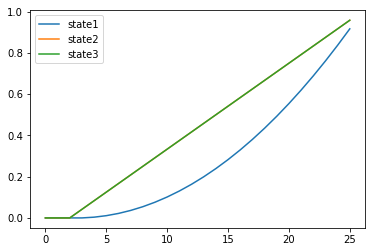

In [14]:
# state value without pseudo rewards
fig, ax = plt.subplots()
x = len(state_value_batch)
y1, y2, y3 = [], [], []
for i in range(x):
    y1.append(state_value_batch[i][0])
    y2.append(state_value_batch[i][1])
    y3.append(state_value_batch[i][2])
    
ax.plot(y1, label='state1')
ax.plot(y2, label='state2')
ax.plot(y3, label='state3')
ax.legend()

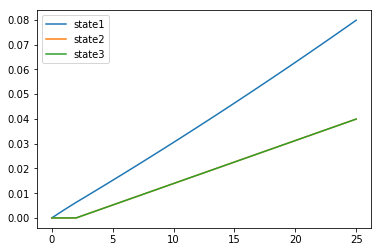

In [15]:
# state value with pseudo rewards
fig, ax = plt.subplots()
x = len(state_value_pseudo_batch)
y1, y2, y3 = [], [], []
for i in range(x):
    y1.append(state_value_pseudo_batch[i][0])
    y2.append(state_value_pseudo_batch[i][1])
    y3.append(state_value_pseudo_batch[i][2])
    
ax.plot(y1, label='state1')
ax.plot(y2, label='state2')
ax.plot(y3, label='state3')
ax.legend()

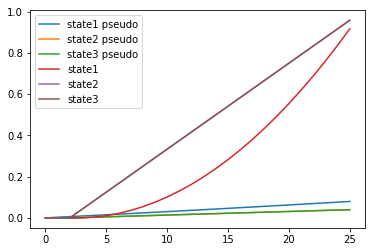

In [16]:
# combined state value with and without pseudo rewards
fig, ax = plt.subplots()
x_pseudo= len(state_value_pseudo_batch)
x = len(state_value_batch)
y1, y2, y3, y4, y5, y6 = [], [], [], [], [], []
for i in range(x_pseudo):
    y1.append(state_value_pseudo_batch[i][0])
    y2.append(state_value_pseudo_batch[i][1])
    y3.append(state_value_pseudo_batch[i][2])
for j in range(x):
    y4.append(state_value_batch[j][0])
    y5.append(state_value_batch[j][1])
    y6.append(state_value_batch[j][2])
    
ax.plot(y1, label='state1 pseudo')
ax.plot(y2, label='state2 pseudo')
ax.plot(y3, label='state3 pseudo')
ax.plot(y4, label='state1')
ax.plot(y5, label='state2')
ax.plot(y6, label='state3')
ax.legend()